In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [4]:
train_data = '/home/marwa/titanic/train.csv'
test_data= '/home/marwa/titanic/test.csv'
data_frame = pd.read_csv(train_data)
test_frame = pd.read_csv(test_data)
data_frame.head()
# print(data_frame.shape[0])
# features included in the dataset

    # PassengerId - Passenger ID - Number
    # Survived - Survived - Bool
    # Pclass - Ticket class - available 1 = 1st, 2 = 2nd, 3 = 3rd - Number
    # Name - First name, Last Name and optional Title - String
    # Sex - Sex of passenger - available: male and female - String
    # Age - Age in years - Number
    # SibSp - of siblings / spouses aboard the Titanic - Number
    # Parch - of parents / children aboard the Titanic - Number
    # Ticket - Ticket Id - String
    # Fare - Passenger fare / Ticker price - Number
    # Cabin - Cabin number - String
    # Embarked - Port of Embarkation - available C = Cherbourg, Q = Queenstown, S = Southampton - String


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
survived_classe1 = data_frame.loc[data_frame.Pclass==1]['Survived']
# print(survived_classe1)
survived_classe1.head()
class1 = sum(survived_classe1)/len(survived_classe1)
print(class1)
survived_classe2 = data_frame.loc[data_frame.Pclass==2]['Survived']
class2 = sum(survived_classe2)/len(survived_classe2)
print(class2)
survived_classe3 = data_frame.loc[data_frame.Pclass==3]['Survived']
class3 = sum(survived_classe3)/len(survived_classe3)
print(class3)

classes = [class1,class2,class3]
print(classes)
classes_data = pd.DataFrame({'Pclass':[1,2,3], 'Survived':classes})
print(classes_data)

# classes_data.describe()
# pclass_impact_on_survive = data_frame[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean()
# pclass_impact_on_survive.head(10)
# pclass_impact_on_survive.reset_index()


0.6296296296296297
0.47282608695652173
0.24236252545824846
[0.6296296296296297, 0.47282608695652173, 0.24236252545824846]
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


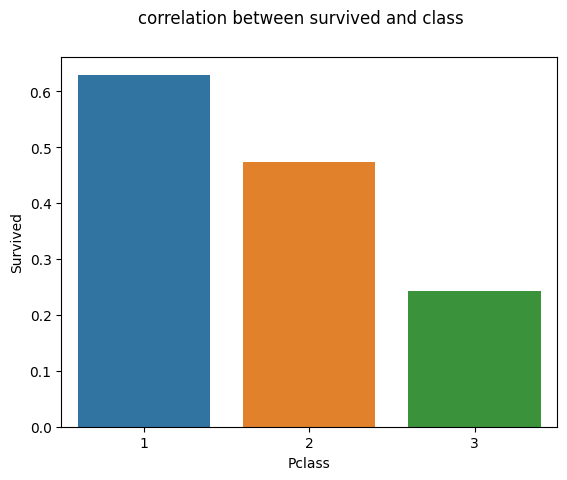

In [6]:
#visulaize results
snb.barplot(data=classes_data.reset_index(), x='Pclass', y="Survived")
plt.suptitle('correlation between survived and class')
plt.show()
# the results illustrate that most survivals are from class1

0.7420382165605095
0.18890814558058924
     Sex  Survived
0  women  0.742038
1    men  0.188908


Text(0.5, 0.98, 'correlation between survived and men&women')

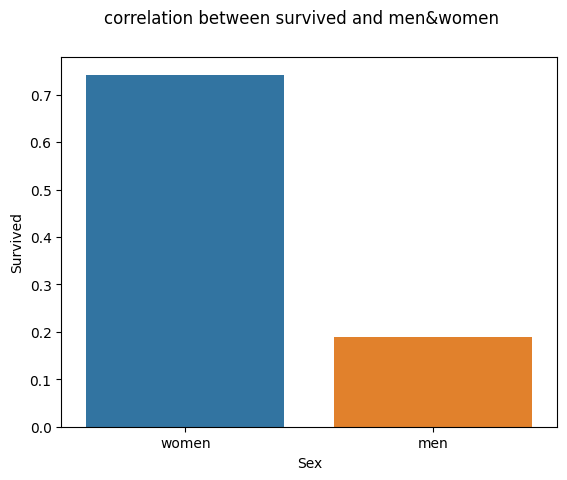

In [7]:
# relationship between sex and survived persons
women = data_frame.loc[data_frame.Sex=='female']['Survived']
women.head(10)
survived_women = sum(women)/len(women)
print(survived_women)

men = data_frame.loc[data_frame.Sex=='male']['Survived']
survived_men = sum(men)/len(men)
print(survived_men)
Survived_men_women = pd.DataFrame({'Sex':['women','men'], 'Survived':[survived_women,survived_men]})
print(Survived_men_women)

#visulaize results
snb.barplot(data=Survived_men_women, x='Sex', y='Survived')
plt.suptitle('correlation between survived and men&women')
# the results illustrates that more than 70% of survivals are women

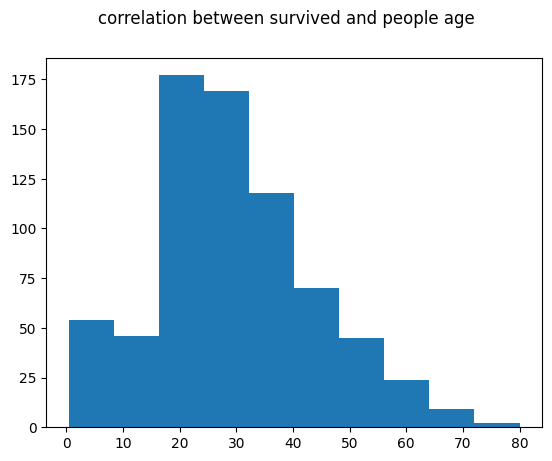

In [8]:
# relationship between  survivals and age
data_frame.head()
age = data_frame[['Survived','Age']]
age.head()
age_more35 = age[age['Age']>35]
age_more35.head()
# #visulaize results
plt.hist(age['Age'])
plt.suptitle('correlation between survived and people age')
plt.show()


In [9]:
#separate title from name
data_frame['Title'] = data_frame['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip() )
title_impact_on_survive = data_frame[~data_frame['Survived'].isna()][['Title', 'Survived']].groupby('Title')['Survived'].mean()
title_impact_on_survive
data_frame['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

data_frame = pd.read_csv(train_data)
test_frame = pd.read_csv(test_data)
data_frame.head(10)

# ckeack Null colomns
null_col= data_frame.columns[data_frame.isnull().any()]
# print(data_frame[null_col].isna().sum())

# fill nan vlaues of age with mean vlaue of ages
data_frame['Age'].fillna(data_frame['Age'].mean(), inplace=True)
data_frame['Cabin'].fillna(data_frame['Cabin'].mode()[0], inplace=True)
data_frame['Embarked'].fillna(data_frame['Embarked'].mode()[0], inplace=True)
test_frame['Age'].fillna(test_frame['Age'].mean(), inplace=True)

print(data_frame)
data_frame.head()
# print number of columns and rows
rows = data_frame.shape[0]
columns=data_frame.shape[1]
# print(rows, columns)

# classification using SVM


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [11]:
features = ['Survived','Name', 'Ticket','Cabin', 'Embarked']
features_test = ['Name', 'Ticket','Cabin', 'Embarked']

train_x = data_frame.drop(features,axis=1)
test_x = test_frame.drop(features_test,axis=1)
test_x.fillna(0, inplace=True)

# print(train_x)
train_y = data_frame.loc[:,'Survived']
# print(train_y)

# encode categoral features using pd.getdummies or skitlearn.preprocessing.onehotEncoder
train_x = pd.get_dummies(train_x)
test_xx = pd.get_dummies(test_x)
print(test_xx)

# print(train_x)


# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(train_x[['Pclass','Sex','Age','SibSp','Parch','Fare']]).toarray())
# # print(enc_df)
# merge with main train_x one key value 
# train_x = train_x.join(enc_df)
# train_x.head(10)

# train data using support vector machine
# clf = SVM()
#clf.fit()

# train data using random forest classifier
# clf=RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=0)
# clf.fit(train_x,train_y)

#train data using add boost classifier achieved 72% and prediction 96%
clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.1, random_state=0).fit(train_x,train_y) 
score = cross_val_score(clf, train_x,train_y, cv=5)
score.mean()

# achieved 77% precision and 52% predictions
# clf = DecisionTreeClassifier(random_state=0, max_depth=2)
# clf = clf.fit(train_x,train_y)
# score = cross_val_score(clf, train_x,train_y, cv=5)
# score.mean()






     PassengerId  Pclass       Age  SibSp  Parch      Fare  Sex_female  \
0            892       3  34.50000      0      0    7.8292           0   
1            893       3  47.00000      1      0    7.0000           1   
2            894       2  62.00000      0      0    9.6875           0   
3            895       3  27.00000      0      0    8.6625           0   
4            896       3  22.00000      1      1   12.2875           1   
..           ...     ...       ...    ...    ...       ...         ...   
413         1305       3  30.27259      0      0    8.0500           0   
414         1306       1  39.00000      0      0  108.9000           1   
415         1307       3  38.50000      0      0    7.2500           0   
416         1308       3  30.27259      0      0    8.0500           0   
417         1309       3  30.27259      1      1   22.3583           0   

     Sex_male  
0           1  
1           0  
2           1  
3           1  
4           0  
..        ...  

0.7217814324273428

In [16]:
predictions = clf.predict(test_xx)
output = pd.DataFrame({'PassangerID':test_x.PassengerId, 'Sex':test_x.Sex, 'Survived':predictions})
output.head(10)
women = output.loc[output.Sex=='female']['Survived']
women = sum(women)/len(women)
output = output.drop(['Sex'], axis=1)
output.head(5)
print(f'women to survive ration:{women * 100}%')

output.to_csv("Submission.csv", index=True)
print("Submission Done")


women to survive ration:96.05263157894737%
Submission Done
